In [ ]:
## This script extracts files from a zip archive.

import zipfile 
import os

zip_path = "/Users/mark/Desktop/Python & Data Analytics/Repositories/House-Price-Prediction/archive.zip"
extract_to = "/Users/mark/Desktop/Python & Data Analytics/Repositories/House-Price-Prediction/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)
    
print(f"Extracted files to {extract_to}")


Extracted files to /Users/mark/Desktop/Python & Data Analytics/Repositories/House-Price-Prediction/


In [30]:
#Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('housing.csv')

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
#We split into train and test sets
#We train on one set and test on another 
#Therefore we can use the train_test_split function from sklearn

from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']


In [ ]:
# Notice that now x is a table without median_house_value and y is a series with median_house_value
x
# y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [21]:
train_data = x_train.join(y_train)


In [22]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18678,-121.84,36.94,29.0,4921.0,967.0,2319.0,823.0,4.9517,NEAR OCEAN,307900.0
3824,-118.47,34.19,33.0,3879.0,943.0,2113.0,843.0,3.8920,<1H OCEAN,292900.0
8253,-118.17,33.77,36.0,2933.0,881.0,2077.0,838.0,2.2538,NEAR OCEAN,181300.0
10673,-117.85,33.62,13.0,5192.0,658.0,1865.0,662.0,15.0001,<1H OCEAN,500001.0
14242,-117.09,32.69,20.0,1102.0,205.0,852.0,217.0,3.1833,NEAR OCEAN,108300.0
...,...,...,...,...,...,...,...,...,...,...
6532,-118.08,34.07,32.0,4089.0,975.0,3775.0,955.0,3.2900,<1H OCEAN,205500.0
19732,-122.08,40.09,19.0,2611.0,503.0,1185.0,483.0,2.3657,INLAND,94000.0
7824,-118.13,33.91,36.0,1967.0,316.0,910.0,306.0,4.4948,<1H OCEAN,190600.0
12268,-116.86,33.73,13.0,2604.0,443.0,978.0,417.0,2.9330,INLAND,170700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

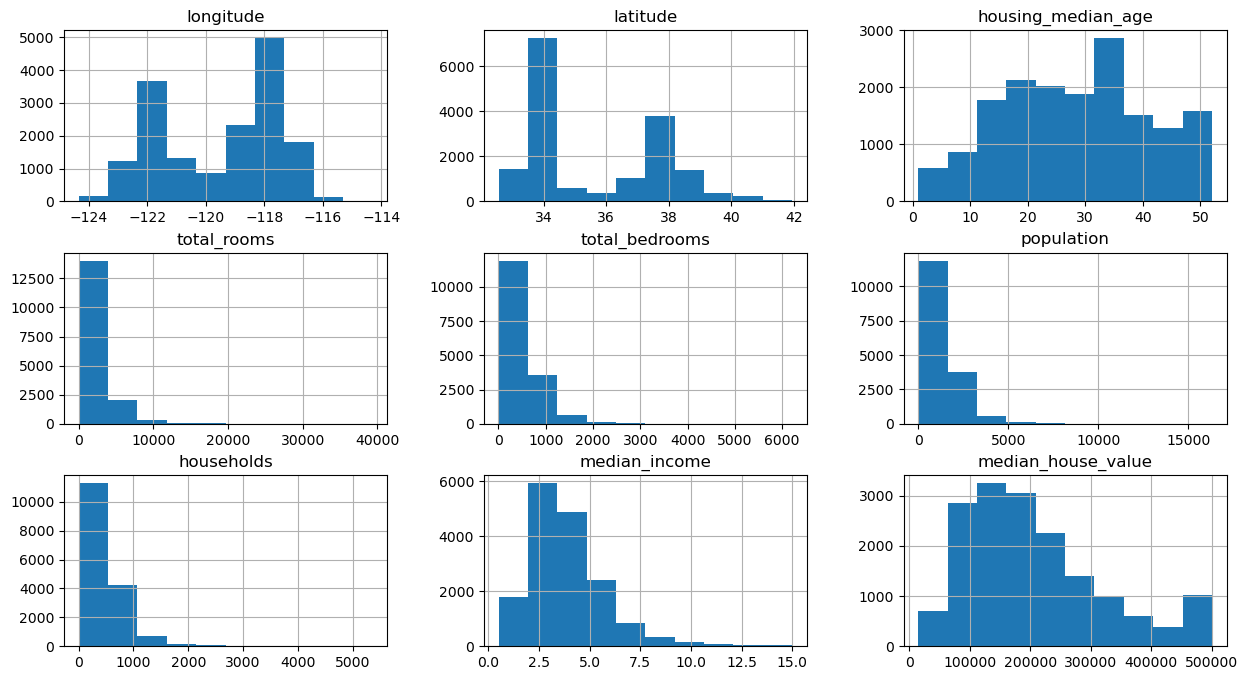

In [26]:
train_data.hist(figsize=(15, 8))

<Axes: >

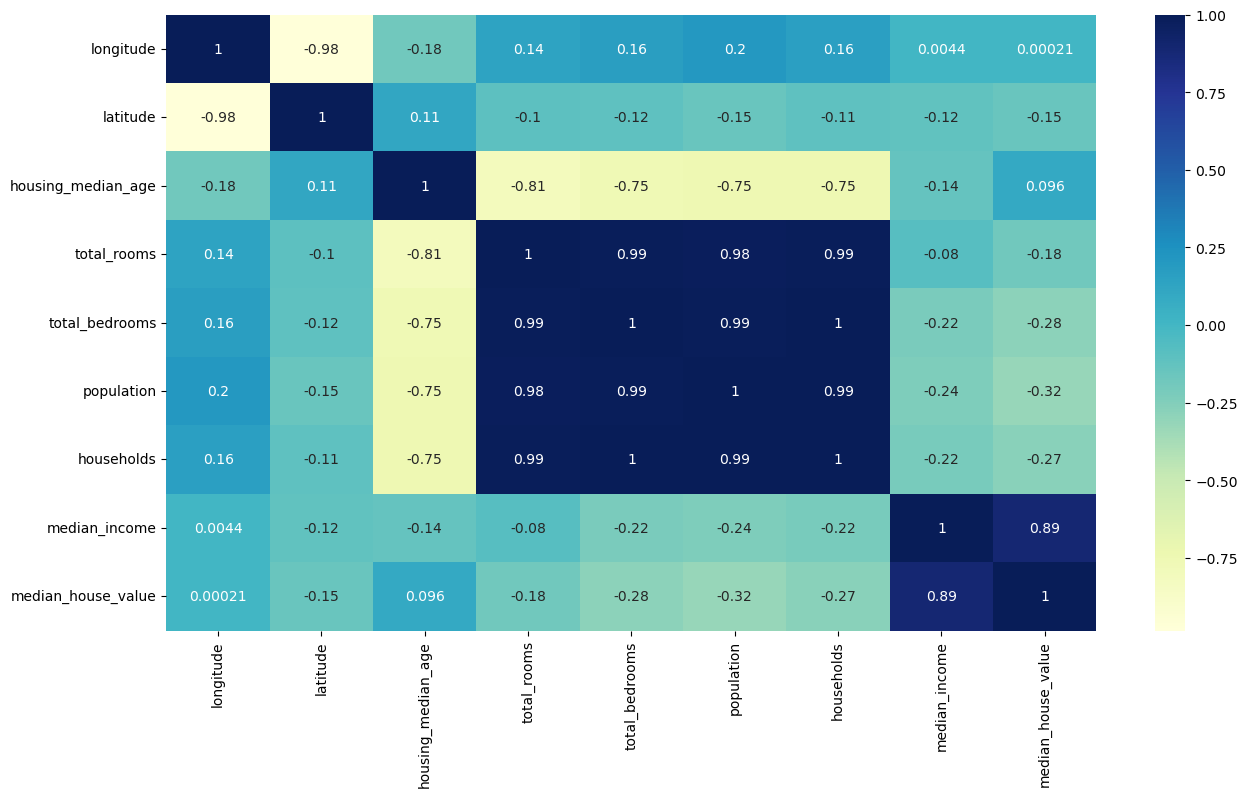

In [46]:
plt.figure(figsize=(15,8))
train_data_drop = train_data.drop(columns=["ocean_proximity"]).corr()
sns.heatmap(train_data_drop.corr(), annot=True, cmap='YlGnBu')

In [47]:
train_data["total_room"] = np.log(train_data["total_rooms"]+1)
train_data["total_bedrooms"] = np.log(train_data["total_rooms"]+1)
train_data["population"] = np.log(train_data["total_rooms"]+1)
train_data["households"] = np.log(train_data["total_rooms"]+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'total_room'}>, <Axes: >, <Axes: >]],
      dtype=object)

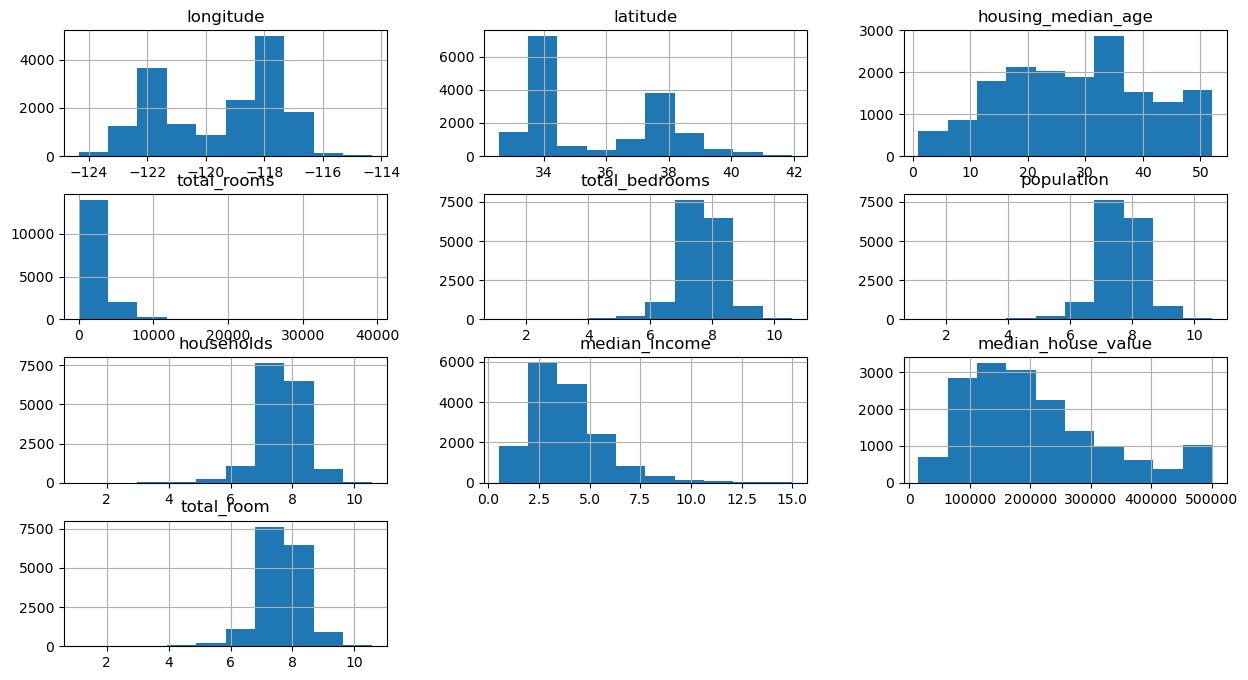

In [48]:
train_data.hist(figsize=(15, 8))

In [49]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7324
INLAND        5211
NEAR OCEAN    2148
NEAR BAY      1825
ISLAND           4
Name: count, dtype: int64

In [52]:
pd.get_dummies(train_data.ocean_proximity)


,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18678,False,False,False,False,True
3824,True,False,False,False,False
8253,False,False,False,False,True
10673,True,False,False,False,False
14242,False,False,False,False,True
...,...,...,...,...,...
6532,True,False,False,False,False
19732,False,True,False,False,False
7824,True,False,False,False,False
12268,False,True,False,False,False


In [57]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

In [58]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18678,-121.84,36.94,29.0,4921.0,8.501470,8.501470,8.501470,4.9517,307900.0,8.501470,False,False,False,False,True
3824,-118.47,34.19,33.0,3879.0,8.263590,8.263590,8.263590,3.8920,292900.0,8.263590,True,False,False,False,False
8253,-118.17,33.77,36.0,2933.0,7.984122,7.984122,7.984122,2.2538,181300.0,7.984122,False,False,False,False,True
10673,-117.85,33.62,13.0,5192.0,8.555067,8.555067,8.555067,15.0001,500001.0,8.555067,True,False,False,False,False
14242,-117.09,32.69,20.0,1102.0,7.005789,7.005789,7.005789,3.1833,108300.0,7.005789,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6532,-118.08,34.07,32.0,4089.0,8.316300,8.316300,8.316300,3.2900,205500.0,8.316300,True,False,False,False,False
19732,-122.08,40.09,19.0,2611.0,7.867871,7.867871,7.867871,2.3657,94000.0,7.867871,False,True,False,False,False
7824,-118.13,33.91,36.0,1967.0,7.584773,7.584773,7.584773,4.4948,190600.0,7.584773,True,False,False,False,False
12268,-116.86,33.73,13.0,2604.0,7.865188,7.865188,7.865188,2.9330,170700.0,7.865188,False,True,False,False,False


<Axes: >

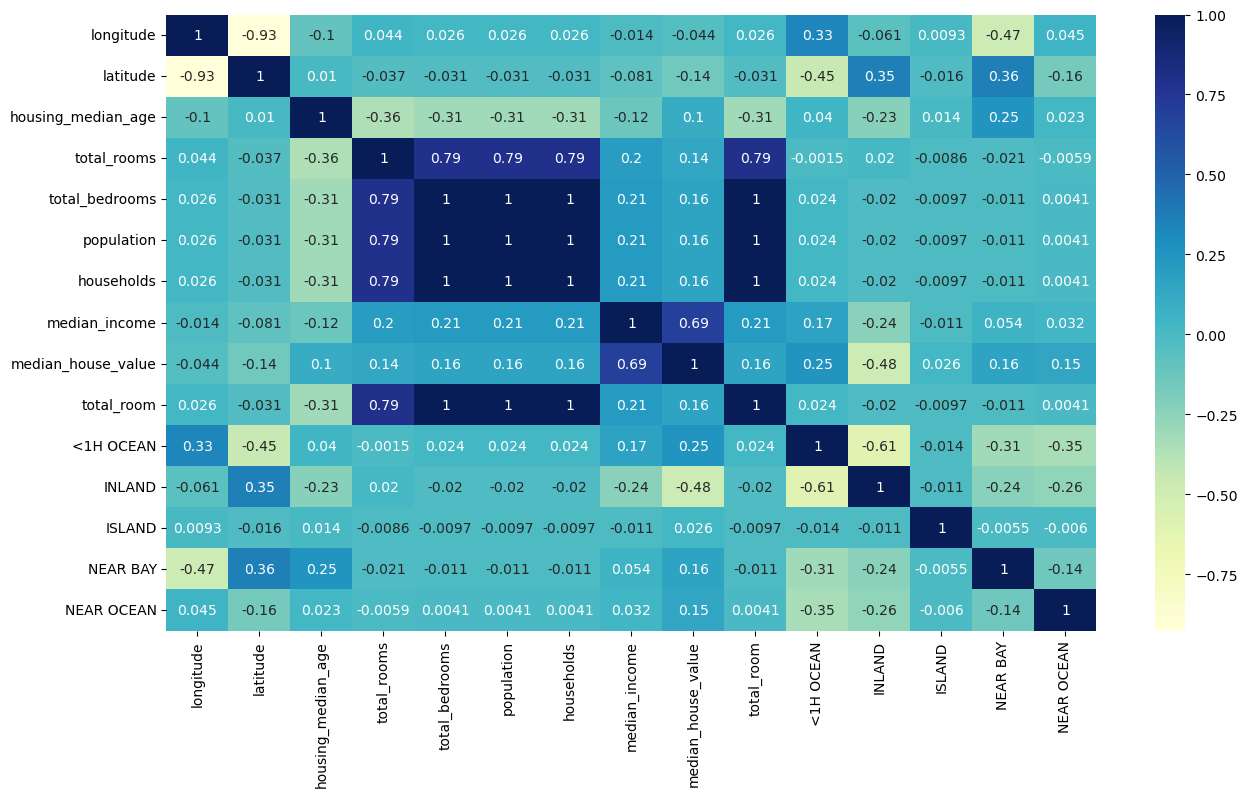

In [61]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')